## Dicionário de Dados

| Variável | Definição                                      | Chave                                          |
|----------|------------------------------------------------|------------------------------------------------|
| survival | Sobrevivência                                  | 0 = Não, 1 = Sim                               |
| pclass   | Classe do Bilhete                              | 1 = 1ª, 2 = 2ª, 3 = 3ª                         |
| sex      | Sexo                                           |                                                |
| Age      | Idade em anos                                  |                                                |
| sibsp    | Número de irmãos / cônjuges a bordo do Titanic |                                                |
| parch    | Número de pais / filhos a bordo do Titanic     |                                                |
| ticket   | Número do Bilhete                              |                                                |
| fare     | Tarifa do Passageiro                           |                                                |
| cabin    | Número da Cabine                               |                                                |
| embarked | Porto de Embarque                              | C = Cherbourg, Q = Queenstown, S = Southampton |

pclass: Classes economicas: 
    * 1st = Upper,
    * 2nd = Middle,
    * 3rd = Lower
age: Idade estimada
sibsp: Irmãos e cônjuges a bordo.
    * Sibling = Irmão, irmã, meio-irmão, meia-irmã;;;
    * Spouse = Marido, esposa (amantes e noivos foram ignorados)
parch: Pais e filhos a bordo.
    * Parent = Mãe, pai
    * Child = Filha, filho, enteada, enteado
    * Algumas crianças viajaram apenas com uma babá, portanto parch = 0 para elas.

In [1]:
# Parte do código teve IA como copiloto, principalmente na questão de autocompletar códigos e correção de erros.

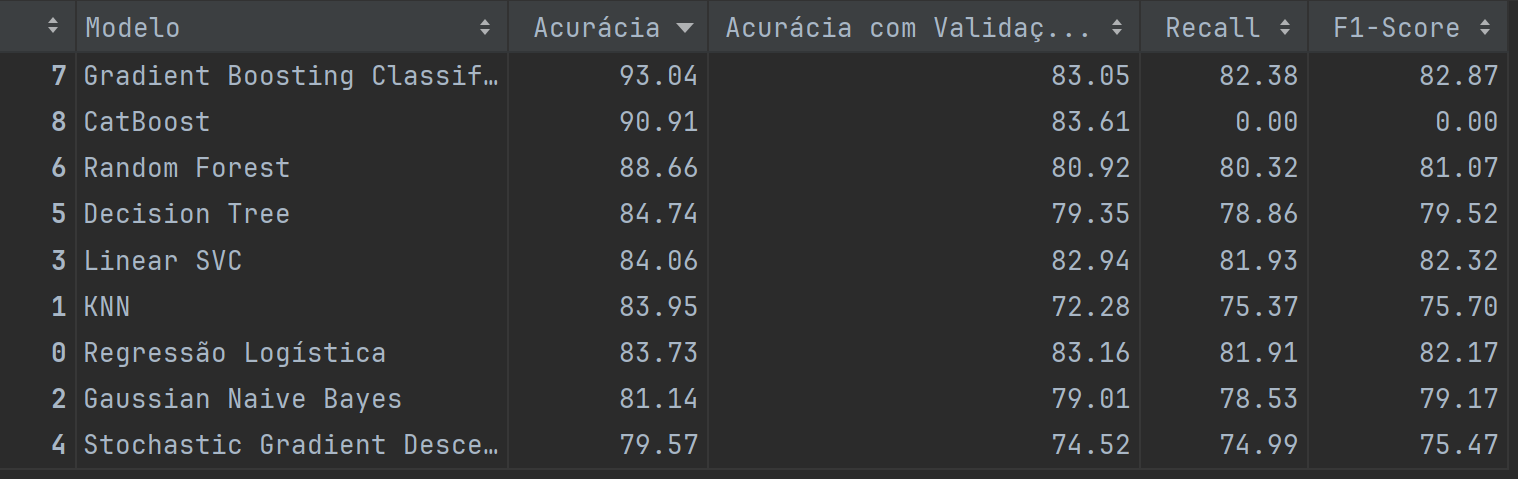

In [2]:
# Resultados das analises. 
# Os resultados abaixo mostram como sempre devemos nos basear em outras métricas alem da acuracia.

from IPython.display import Image

Image(filename='./output/resultado.png')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

# Machine learning
from sklearn import model_selection, metrics
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import cv

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

In [4]:
# Verificando os arquivos no diretório
import os

for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\file.csv
input\gender_submission.csv
input\test.csv
input\train.csv


In [5]:
# Testando a leitura do arquivo
train_data = pd.read_csv('input/train.csv')
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Testando a leitura do arquivo
test_data = pd.read_csv('input/test.csv')
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# Salvar PassengerId para auxiliar na criação do arquivo que será enviado ao Kaggle
passengerId = test_data['PassengerId']
passengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [12]:
# Criando um novo dataset com os dados de treino e teste
titanic_df = pd.concat([train_data, test_data], sort=False)

In [13]:
# Para auxiliar no momento separar o DF titanic_df em train e test
train_index = len(train_data)
test_index = len(titanic_df) - len(test_data)

In [14]:
# Verificando o novo dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [15]:
# Verificando os dados faltantes
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [17]:
# Verificando a distribuição dos dados
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [18]:
# Verificando a distribuição dos dados
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# Criando o df onde iremos processar os modelos de ML

df = pd.DataFrame()

In [20]:
# Sobreviventes
titanic_df['Survived'].nunique()

2

In [21]:
titanic_df['Survived'].unique()

array([ 0.,  1., nan])

In [22]:
titanic_df['Survived'].isnull().sum()

418

In [23]:
titanic_df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

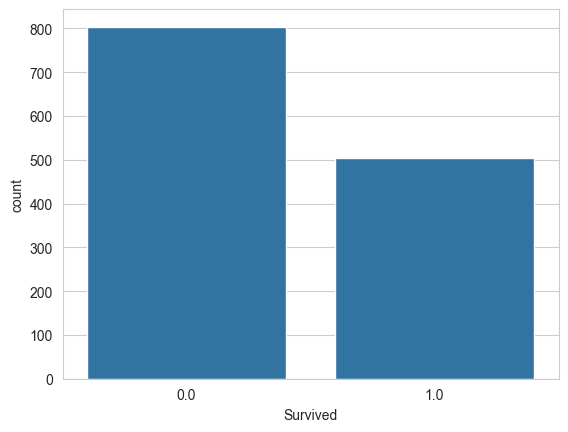

In [24]:
sns.countplot(data=titanic_df, x='Survived')

Quantidade de valores únicos: 2

Quais são os valores únicos: [ 0.  1. nan]

Quantidade de valores nulos: 418

Quantidade por opção: 
Survived
0.0    549
1.0    342
Name: count, dtype: int64


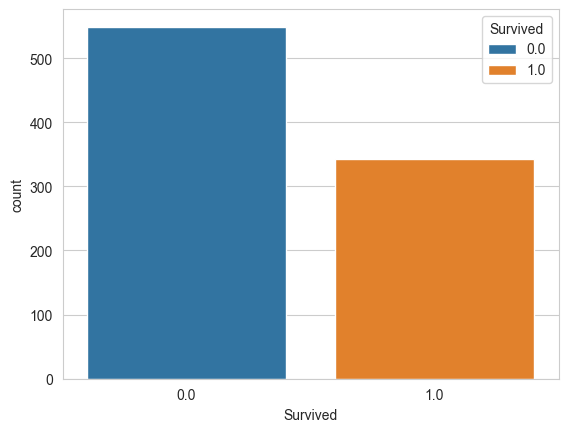

In [25]:
# Criando uma função para ajudar no momento de visualizar as informações de cada coluna

def titanic_func(data, column, count=True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade por opção: \n{data[column].value_counts()}')

    if count:
        sns.countplot(data=data, x=column, hue='Survived')
    else:
        sns.displot(data[column], kde=True)


titanic_func(titanic_df, 'Survived')

In [26]:
df['Survived'] = titanic_df['Survived']

In [27]:
df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
413,NaN
414,NaN
415,NaN
416,NaN


In [28]:
### Pclass

Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0

Quantidade por opção: 
Pclass
3    709
1    323
2    277
Name: count, dtype: int64


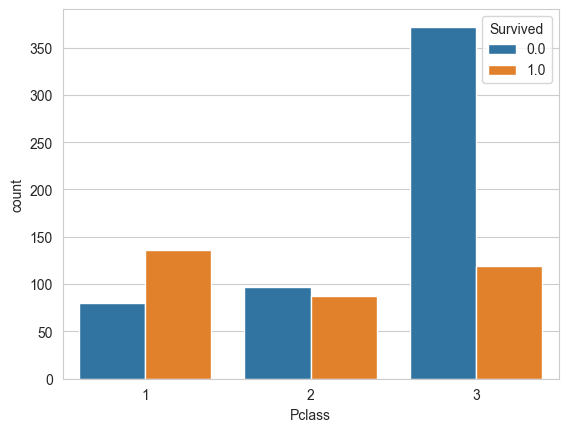

In [29]:
titanic_func(titanic_df, 'Pclass')

In [30]:
df['Pclass'] = titanic_df['Pclass']
df.head()

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3


In [31]:
### Sex

In [32]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [33]:
titanic_df['Sex'] = titanic_df['Sex'].replace(['female', 'male'], [1, 0])

Quantidade de valores únicos: 2

Quais são os valores únicos: [0 1]

Quantidade de valores nulos: 0

Quantidade por opção: 
Sex
0    843
1    466
Name: count, dtype: int64


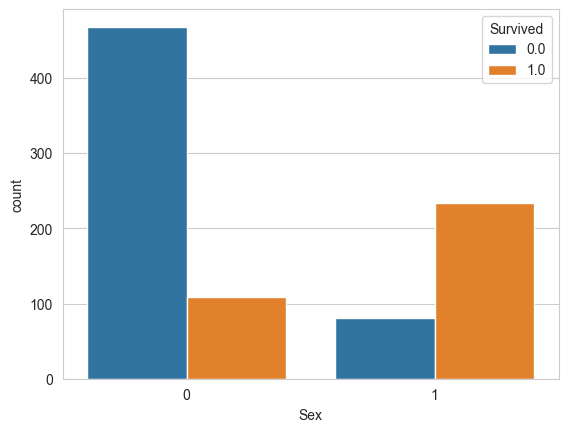

In [34]:
titanic_func(titanic_df, 'Sex')

In [35]:
df['Sex'] = titanic_df['Sex']
df.head()

,Survived,Pclass,Sex
0,0.0,3,0
1,1.0,1,1
2,1.0,3,1
3,1.0,1,1
4,0.0,3,0


In [36]:
### Age

Quantidade de valores únicos: 98

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos: 263

Quantidade por opção: 
Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64


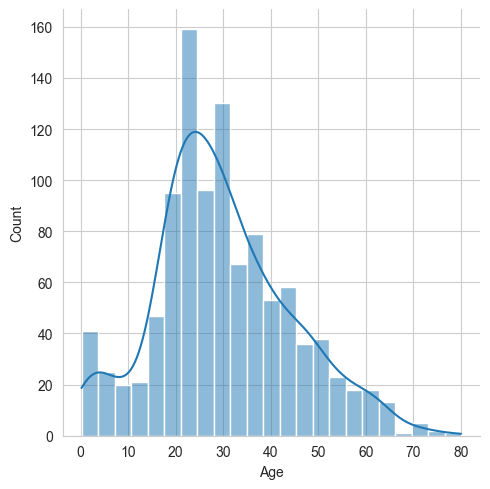

In [37]:
titanic_func(titanic_df, 'Age', count=False)

In [38]:
# Cria uma cópia do dataframe original, mantendo apenas as colunas numéricas
numeric_df = titanic_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

In [39]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].mean()

39.15992957746479

In [40]:
titanic_df[titanic_df['Pclass'] == 2]['Age'].mean()

29.506704980842912

In [41]:
titanic_df[titanic_df['Pclass'] == 3]['Age'].mean()

24.81636726546906

In [42]:
for i in sorted(numeric_df['Pclass'].unique()):
    print(f'Pessoas da {i}º classe tem em média {round(numeric_df[numeric_df["Pclass"] == i]["Age"].mean(), 2)} anos')

Pessoas da 1º classe tem em média 39.16 anos
Pessoas da 2º classe tem em média 29.51 anos
Pessoas da 3º classe tem em média 24.82 anos


In [43]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].isnull().sum()

39

In [44]:
titanic_df['Age'].isnull().sum()

263

In [45]:
# Preenchendo os valores nulos com a média de idade de cada classe
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df.groupby('Pclass')['Age'].transform('mean'))


In [46]:
titanic_df['Age'].isnull().sum()

0

Quantidade de valores únicos: 101

Quais são os valores únicos: [22.         38.         26.         35.         24.81636727 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         29.50670498 31.         34.         15.
 28.          8.         19.         40.         39.15992958 66.
 42.         21.         18.          3.          7.         49.
 29.         65.         28.5         5.         11.         45.
 17.         32.         16.         25.          0.83       30.
 33.         23.         24.         46.         59.         71.
 37.         47.         14.5        70.5        32.5        12.
  9.         36.5        51.         55.5        40.5        44.
  1.         61.         56.         50.         36.         45.5
 20.5        62.         41.         52.         63.         23.5
  0.92       43.         60.         10.         64.         13.
 48.          0.75       53.         57.         80.         70.
 24.5         6.        

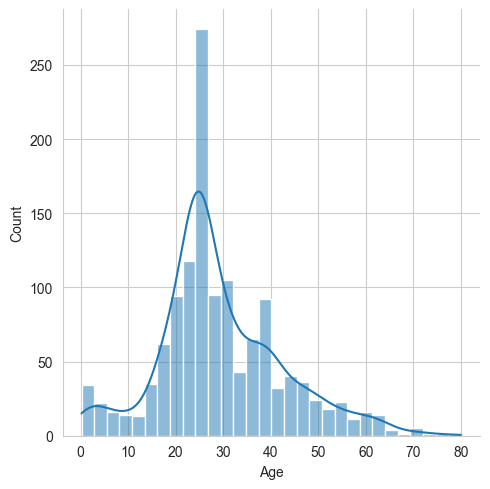

In [47]:
titanic_func(titanic_df, 'Age', count=False)

In [48]:
df['Age'] = titanic_df['Age']

In [49]:
df.head()

,Survived,Pclass,Sex,Age
0,0.0,3,0,22.0
1,1.0,1,1,38.0
2,1.0,3,1,26.0
3,1.0,1,1,35.0
4,0.0,3,0,35.0


In [50]:
### SibSp

Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Quantidade por opção: 
SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


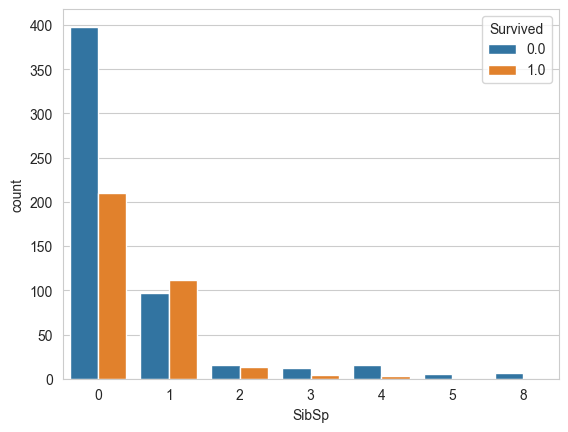

In [51]:
titanic_func(titanic_df, 'SibSp')

In [52]:
df['SibSp'] = titanic_df['SibSp']
df.head()

,Survived,Pclass,Sex,Age,SibSp
0,0.0,3,0,22.0,1
1,1.0,1,1,38.0,1
2,1.0,3,1,26.0,0
3,1.0,1,1,35.0,1
4,0.0,3,0,35.0,0


In [53]:
### Parch

Quantidade de valores únicos: 8

Quais são os valores únicos: [0 1 2 5 3 4 6 9]

Quantidade de valores nulos: 0

Quantidade por opção: 
Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


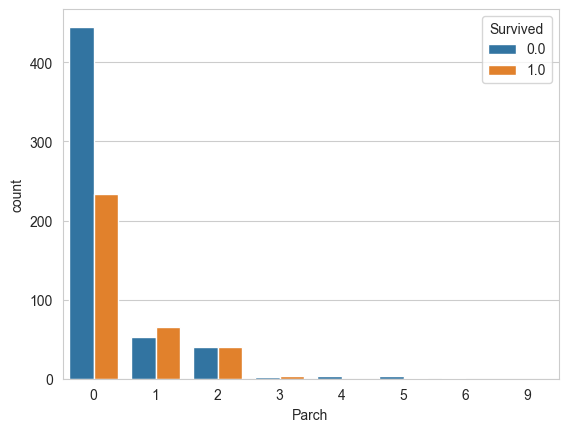

In [54]:
titanic_func(titanic_df, 'Parch')

In [55]:
df['Parch'] = titanic_df['Parch']

In [56]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0.0,3,0,22.0,1,0
1,1.0,1,1,38.0,1,0
2,1.0,3,1,26.0,0,0
3,1.0,1,1,35.0,1,0
4,0.0,3,0,35.0,0,0


In [57]:
### FamilySize 

In [58]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [59]:
df['FamilySize'] = titanic_df['FamilySize']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize
0,0.0,3,0,22.0,1,0,2
1,1.0,1,1,38.0,1,0,2
2,1.0,3,1,26.0,0,0,1
3,1.0,1,1,35.0,1,0,2
4,0.0,3,0,35.0,0,0,1


Quantidade de valores únicos: 9

Quais são os valores únicos: [ 2  1  5  3  7  6  4  8 11]

Quantidade de valores nulos: 0

Quantidade por opção: 
FamilySize
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64


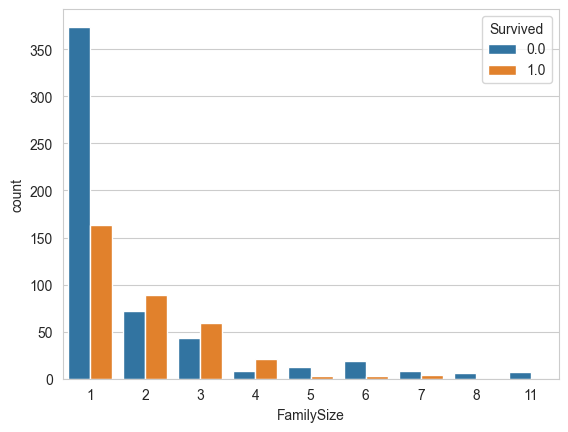

In [60]:
titanic_func(titanic_df, 'FamilySize')

In [61]:
### Fare

Quantidade de valores únicos: 281

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      1

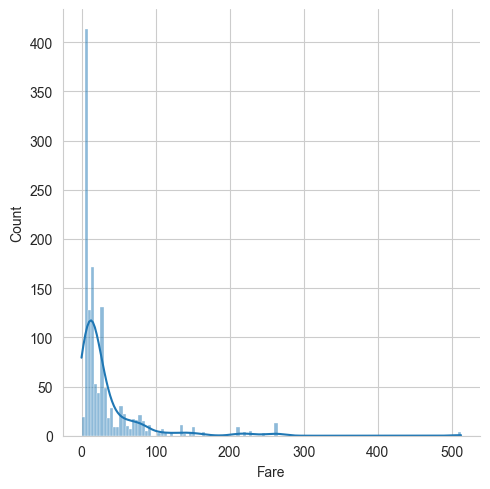

In [62]:
titanic_func(titanic_df, 'Fare', count=False)

In [63]:
titanic_df['Fare'].isnull().sum()

1

In [64]:
# Preenchendo os valores nulos com a média de tarifa de cada classe
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df.groupby('Pclass')['Fare'].transform('mean'))

In [65]:
titanic_df['Fare'].isnull().sum()

0

Quantidade de valores únicos: 282

Quais são os valores únicos: [  7.25       71.2833      7.925      53.1         8.05        8.4583
  51.8625     21.075      11.1333     30.0708     16.7        26.55
  31.275       7.8542     16.         29.125      13.         18.
   7.225      26.          8.0292     35.5        31.3875    263.
   7.8792      7.8958     27.7208    146.5208      7.75       10.5
  82.1708     52.          7.2292     11.2417      9.475      21.
  41.5792     15.5        21.6792     17.8        39.6875      7.8
  76.7292     61.9792     27.75       46.9        80.         83.475
  27.9        15.2458      8.1583      8.6625     73.5        14.4542
  56.4958      7.65       29.         12.475       9.          9.5
   7.7875     47.1        15.85       34.375      61.175      20.575
  34.6542     63.3583     23.         77.2875      8.6542      7.775
  24.15        9.825      14.4583    247.5208      7.1417     22.3583
   6.975       7.05       14.5        15.0458     26

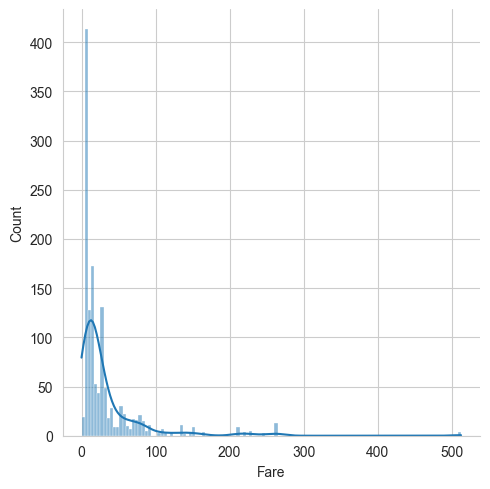

In [66]:
titanic_func(titanic_df, 'Fare', count=False)

In [67]:
# media da tarifa por classe
titanic_df.groupby('Pclass')['Fare'].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [68]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
FamilySize        0
dtype: int64

In [69]:
df['Fare'] = titanic_df['Fare']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare
0,0.0,3,0,22.0,1,0,2,7.2500
1,1.0,1,1,38.0,1,0,2,71.2833
2,1.0,3,1,26.0,0,0,1,7.9250
3,1.0,1,1,35.0,1,0,2,53.1000
4,0.0,3,0,35.0,0,0,1,8.0500


In [70]:
### Cabin

In [71]:
titanic_df['Cabin'].isnull().sum()

1014

In [72]:
titanic_df['Cabin'].nunique()

186

In [73]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [74]:
titanic_df['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [75]:
titanic_df['Cabin'].fillna('N', inplace=True)

In [76]:
titanic_df['Cabin'].isnull().sum()

0

In [77]:
titanic_df['Cabin'].nunique()

187

In [78]:
titanic_df['Cabin'].unique()

array(['N', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [79]:
titanic_df['Cabin'].value_counts()

Cabin
N                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [80]:
titanic_df['Cabin'] = titanic_df['Cabin'].apply(lambda x: x[0])

In [81]:
titanic_df['Cabin'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [82]:
titanic_df['Cabin'].value_counts()

Cabin
N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

Quantidade de valores únicos: 9

Quais são os valores únicos: ['N' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']

Quantidade de valores nulos: 0

Quantidade por opção: 
Cabin
N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


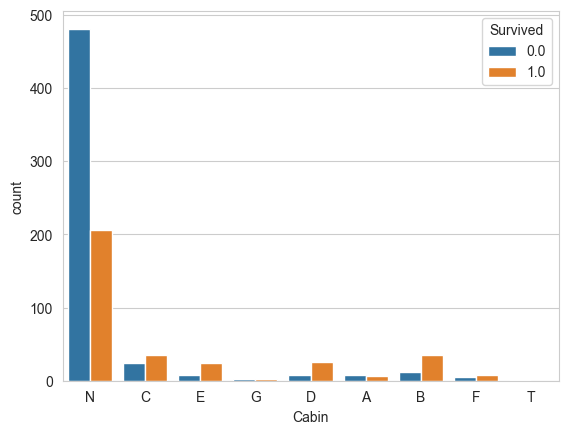

In [83]:
titanic_func(titanic_df, 'Cabin')

In [84]:
df['Cabin'] = titanic_df['Cabin']

In [85]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Cabin
0,0.0,3,0,22.0,1,0,2,7.2500,N
1,1.0,1,1,38.0,1,0,2,71.2833,C
2,1.0,3,1,26.0,0,0,1,7.9250,N
3,1.0,1,1,35.0,1,0,2,53.1000,C
4,0.0,3,0,35.0,0,0,1,8.0500,N


In [86]:
### Embarked

In [87]:
print(titanic_df[titanic_df.index.duplicated()])

     PassengerId  Survived  Pclass  \
0            892       NaN       3   
1            893       NaN       3   
2            894       NaN       2   
3            895       NaN       3   
4            896       NaN       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                             Name  Sex        Age  SibSp  \
0                                Kelly, Mr. James    0  34.500000      0   
1                Wilkes, Mrs. James (Ellen Needs)    1  47.000000      1   
2                       Myles, Mr. Thomas Francis    0  62.000000      0   
3                                Wirz, Mr. Albert    0  27.000000      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1  22.000000      1   
..                                            ...  ...        ...    ...   
413        

In [88]:
titanic_df = titanic_df.reset_index(drop=True)

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


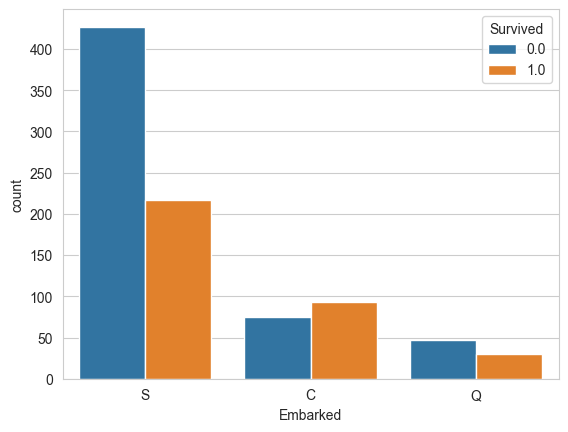

In [89]:
titanic_func(titanic_df, 'Embarked')

In [90]:
titanic_df[titanic_df['Embarked'] == 'S']['Survived'].mean()

0.33695652173913043

In [91]:
titanic_df[titanic_df['Embarked'] == "S"]['Pclass'].mean()

2.3479212253829322

In [92]:
titanic_df[titanic_df['Embarked'] == 'C']['Survived'].mean()

0.5535714285714286

In [93]:
titanic_df[titanic_df['Embarked'] == "C"]['Pclass'].mean()

1.8518518518518519

In [94]:
titanic_df[titanic_df['Embarked'] == 'Q']['Survived'].mean()

0.38961038961038963

In [95]:
titanic_df[titanic_df['Embarked'] == "Q"]['Pclass'].mean()

2.894308943089431

In [96]:
titanic_df['Embarked'].fillna('S', inplace=True)

In [97]:
titanic_df['Embarked'].isnull().sum()

0

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q']

Quantidade de valores nulos: 0

Quantidade por opção: 
Embarked
S    916
C    270
Q    123
Name: count, dtype: int64


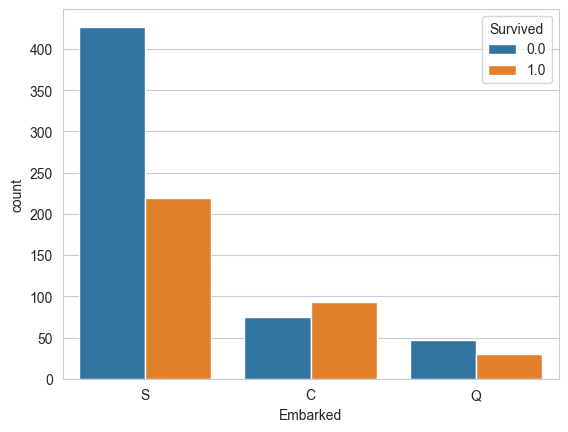

In [98]:
titanic_func(titanic_df, 'Embarked')

In [99]:
df['Embarked'] = titanic_df['Embarked']

In [100]:
### Nome

In [101]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,N,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,N,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,N,S,1


In [102]:
titanic_df['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [103]:
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [104]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [105]:
titanic_df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [106]:
titanic_df['Title'].isnull().sum()

0

In [107]:
titanic_df['Title'] = titanic_df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [108]:
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')

In [109]:
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')

In [110]:
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

In [111]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [112]:
titanic_df['Title'].value_counts()

Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64

Quantidade de valores únicos: 5

Quais são os valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Rare']

Quantidade de valores nulos: 0

Quantidade por opção: 
Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64


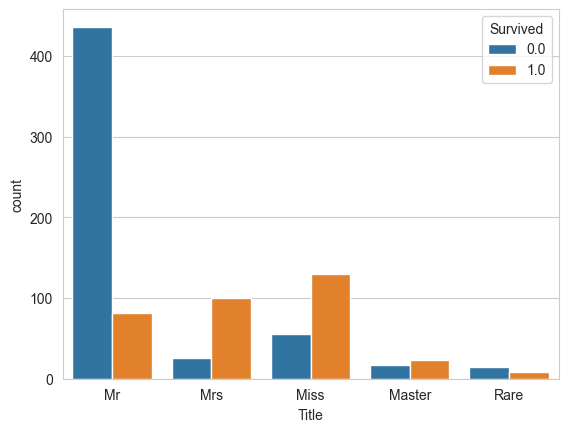

In [113]:
titanic_func(titanic_df, 'Title')

In [114]:
df['Title'] = titanic_df['Title']

In [115]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Cabin,Embarked,Title
0,0.0,3,0,22.0,1,0,2,7.2500,N,S,Mr
1,1.0,1,1,38.0,1,0,2,71.2833,C,C,Mrs
2,1.0,3,1,26.0,0,0,1,7.9250,N,S,Miss
3,1.0,1,1,35.0,1,0,2,53.1000,C,S,Mrs
4,0.0,3,0,35.0,0,0,1,8.0500,N,S,Mr


In [116]:
titanic_df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
FamilySize       0
Title            0
dtype: int64

In [117]:
df.isnull().sum()

Survived      418
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
FamilySize      0
Fare            0
Cabin           0
Embarked        0
Title           0
dtype: int64

In [118]:
# Verificando a correlação entre as variáveis numeŕicas

In [119]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

In [120]:
numeric_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare
Survived,1.000000,-0.338481,0.543351,-0.048914,-0.035322,0.081629,0.016639,0.257307
Pclass,-0.338481,1.000000,-0.124617,-0.443623,0.060832,0.018322,0.050027,-0.558694
Sex,0.543351,-0.124617,1.000000,-0.053271,0.109609,0.213125,0.188583,0.185693
Age,-0.048914,-0.443623,-0.053271,1.000000,-0.198886,-0.131205,-0.202532,0.198349
SibSp,-0.035322,0.060832,0.109609,-0.198886,1.000000,0.373587,0.861952,0.160357
Parch,0.081629,0.018322,0.213125,-0.131205,0.373587,1.000000,0.792296,0.221641
FamilySize,0.016639,0.050027,0.188583,-0.202532,0.861952,0.792296,1.000000,0.226617
Fare,0.257307,-0.558694,0.185693,0.198349,0.160357,0.221641,0.226617,1.000000


In [121]:
# Verificando a correlação entre as variáveis categóricas

In [122]:
categoric_df = df.select_dtypes(exclude=[np.number])

In [123]:
categoric_df.head()

,Cabin,Embarked,Title
0,N,S,Mr
1,C,C,Mrs
2,N,S,Miss
3,C,S,Mrs
4,N,S,Mr


In [124]:
categoric_df = pd.get_dummies(categoric_df)

In [125]:
categoric_df.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False


In [126]:
categoric_df.corr()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
Cabin_A,1.000000,-0.029886,-0.036366,-0.024952,-0.023510,-0.016695,-0.008096,-0.242399,-0.003615,0.042948,0.021100,-0.050964,-0.001633,-0.011602,0.017750,-0.053043,0.099118
Cabin_B,-0.029886,1.000000,-0.063580,-0.043624,-0.041103,-0.029188,-0.014154,-0.423794,-0.006320,0.122812,-0.071950,-0.061321,-0.002109,0.032325,-0.078074,0.048593,0.058994
Cabin_C,-0.036366,-0.063580,1.000000,-0.053083,-0.050016,-0.035516,-0.017224,-0.515684,-0.007691,0.092054,-0.046222,-0.050881,-0.021070,0.003310,-0.014932,0.023062,0.016722
Cabin_D,-0.024952,-0.043624,-0.053083,1.000000,-0.034317,-0.024369,-0.011817,-0.353822,-0.005277,0.066539,-0.016611,-0.047498,-0.023530,-0.000506,-0.026645,0.041669,0.026221
Cabin_E,-0.023510,-0.041103,-0.050016,-0.034317,1.000000,-0.022961,-0.011135,-0.333381,-0.004972,-0.019785,-0.010658,0.024076,-0.019943,0.000446,0.005893,0.015177,-0.027540
Cabin_F,-0.016695,-0.029188,-0.035516,-0.024369,-0.022961,1.000000,-0.007907,-0.236733,-0.003531,-0.030701,0.023502,0.011809,0.056512,0.006059,-0.011688,-0.016894,-0.019556
Cabin_G,-0.008096,-0.014154,-0.017224,-0.011817,-0.011135,-0.007907,1.000000,-0.114803,-0.001712,-0.029937,-0.019491,0.038577,-0.013924,0.027200,-0.046159,0.045979,-0.009484
Cabin_N,-0.242399,-0.423794,-0.515684,-0.353822,-0.333381,-0.236733,-0.114803,1.000000,-0.051263,-0.140487,0.067628,0.079512,0.018775,-0.020116,0.062382,-0.048853,-0.064014
Cabin_T,-0.003615,-0.006320,-0.007691,-0.005277,-0.004972,-0.003531,-0.001712,-0.051263,1.000000,-0.013368,-0.008703,0.017226,-0.006217,-0.014620,0.024058,-0.011218,-0.004235
Embarked_C,0.042948,0.122812,0.092054,0.066539,-0.019785,-0.030701,-0.029937,-0.140487,-0.013368,1.000000,-0.152178,-0.776039,-0.044956,0.036870,-0.075373,0.083664,0.017148


In [127]:
# Verificando a correlação entre as variáveis numeŕicas e categóricas

In [128]:
df = pd.concat([numeric_df, categoric_df], axis=1)

In [129]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Cabin_A,Cabin_B,...,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.0,3,0,22.0,1,0,2,7.2500,False,False,...,True,False,False,False,True,False,False,True,False,False
1,1.0,1,1,38.0,1,0,2,71.2833,False,False,...,False,False,True,False,False,False,False,False,True,False
2,1.0,3,1,26.0,0,0,1,7.9250,False,False,...,True,False,False,False,True,False,True,False,False,False
3,1.0,1,1,35.0,1,0,2,53.1000,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.0,3,0,35.0,0,0,1,8.0500,False,False,...,True,False,False,False,True,False,False,True,False,False


In [130]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Cabin_A,Cabin_B,...,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
Survived,1.000000,-0.338481,0.543351,-0.048914,-0.035322,0.081629,0.016639,0.257307,0.022287,0.175095,...,-0.316912,-0.026456,0.168240,0.003650,-0.149683,0.085221,0.335636,-0.549199,0.341994,-0.012054
Pclass,-0.338481,1.000000,-0.124617,-0.443623,0.060832,0.018322,0.050027,-0.558694,-0.202143,-0.353414,...,0.713857,-0.042750,-0.163242,0.131235,0.058791,0.040155,-0.011779,0.087151,-0.072145,-0.145357
Sex,0.543351,-0.124617,1.000000,-0.053271,0.109609,0.213125,0.188583,0.185693,-0.047561,0.094453,...,-0.137396,-0.020558,0.047688,0.055668,-0.077161,-0.100094,0.464047,-0.587092,0.371622,-0.060559
Age,-0.048914,-0.443623,-0.053271,1.000000,-0.198886,-0.131205,-0.202532,0.198349,0.140760,0.125599,...,-0.309804,0.032979,0.033933,-0.042551,-0.002476,-0.242250,-0.151956,0.107966,0.113695,0.144145
SibSp,-0.035322,0.060832,0.109609,-0.198886,1.000000,0.373587,0.861952,0.160357,-0.039808,-0.011569,...,0.009064,-0.013247,-0.035040,-0.015024,0.040182,0.231622,0.032541,-0.168375,0.064681,-0.014540
Parch,0.081629,0.018322,0.213125,-0.131205,0.373587,1.000000,0.792296,0.221641,-0.030707,0.073051,...,-0.036806,-0.012304,0.005663,-0.056829,0.031319,0.155697,0.027526,-0.178023,0.143886,-0.044552
FamilySize,0.016639,0.050027,0.188583,-0.202532,0.861952,0.792296,1.000000,0.226617,-0.042967,0.032318,...,-0.014155,-0.015438,-0.019953,-0.040943,0.043548,0.237450,0.036449,-0.208052,0.121188,-0.033914
Fare,0.257307,-0.558694,0.185693,0.198349,0.160357,0.221641,0.226617,1.000000,0.020132,0.393788,...,-0.507327,0.001187,0.180854,-0.085063,-0.103632,0.012261,0.065888,-0.111885,0.070125,0.007526
Cabin_A,0.022287,-0.202143,-0.047561,0.140760,-0.039808,-0.030707,-0.042967,0.020132,1.000000,-0.029886,...,-0.242399,-0.003615,0.042948,0.021100,-0.050964,-0.001633,-0.011602,0.017750,-0.053043,0.099118
Cabin_B,0.175095,-0.353414,0.094453,0.125599,-0.011569,0.073051,0.032318,0.393788,-0.029886,1.000000,...,-0.423794,-0.006320,0.122812,-0.071950,-0.061321,-0.002109,0.032325,-0.078074,0.048593,0.058994


In [131]:
train = df[:train_index].copy()
test = df[test_index:].copy()

train['Survived'] = train['Survived'].astype(int)

In [132]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Cabin_A,Cabin_B,...,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22.0,1,0,2,7.2500,False,False,...,True,False,False,False,True,False,False,True,False,False
1,1,1,1,38.0,1,0,2,71.2833,False,False,...,False,False,True,False,False,False,False,False,True,False
2,1,3,1,26.0,0,0,1,7.9250,False,False,...,True,False,False,False,True,False,True,False,False,False
3,1,1,1,35.0,1,0,2,53.1000,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0,3,0,35.0,0,0,1,8.0500,False,False,...,True,False,False,False,True,False,False,True,False,False


In [133]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Cabin_A,Cabin_B,...,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,NaN,3,0,34.5,0,0,1,7.8292,False,False,...,True,False,False,False,True,False,False,True,False,False
1,NaN,3,1,47.0,1,0,2,7.0000,False,False,...,True,False,True,False,False,False,False,False,True,False
2,NaN,2,0,62.0,0,0,1,9.6875,False,False,...,True,False,False,False,True,False,True,False,False,False
3,NaN,3,0,27.0,0,0,1,8.6625,False,False,...,True,False,False,False,True,False,False,False,True,False
4,NaN,3,1,22.0,1,1,3,12.2875,False,False,...,True,False,False,False,True,False,False,True,False,False


In [134]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [135]:
X_test = test.drop('Survived', axis=1)

In [136]:
### Testando varios modelos

In [137]:
def func_acuracia(algoritmo, X_train, y_train, vc):
    modelo = algoritmo.fit(X_train, y_train)
    acuracia = round(modelo.score(X_train, y_train) * 100, 2)

    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv=vc, n_jobs=-1)
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

    return acuracia, acuracia_vc

In [138]:
from sklearn.metrics import recall_score

from sklearn.metrics import f1_score


def func_acuracia_GS(algoritmo, params, X_train, y_train, cv):
    # Instanciando a GridSearchCV
    grid = GridSearchCV(algoritmo, params, cv=cv, n_jobs=-1, verbose=1)

    # Ajustando a GridSearchCV nos dados de treinamento
    grid.fit(X_train, y_train)

    # Selecionando o melhor estimador
    modelo = grid.best_estimator_

    # Verificando a acurácia nos dados de treinamento
    acuracia = round(modelo.score(X_train, y_train) * 100, 2)

    # Obtendo as previsões via cross-validation para verificar a acuracia
    train_pred = cross_val_predict(modelo, X_train, y_train, cv=cv, n_jobs=-1)

    acuracia_cv = round(accuracy_score(y_train, train_pred) * 100, 2)

    # Calcular Recall
    recall = round(recall_score(y_train, train_pred, average='macro') * 100,
                   2)  # Para labels binários pode remover "average"

    # Calcular F1-score
    f1 = round(f1_score(y_train, train_pred, average='macro') * 100, 2)  # Para labels binários pode remover "average"

    print(f"Melhores parâmetros: {grid.best_params_}")
    print(f"Acurácia após GridSearchCV: {acuracia}")
    print(f"Acurácia de validação cruzada: {acuracia_cv}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

    return modelo, acuracia, acuracia_cv, recall, f1

In [139]:
### Regressão Logística

In [140]:
acc_log, acc_log_vc = func_acuracia(LogisticRegression(max_iter=1000), X, y, 10)

print(f'Acurácia Regressão Logística: {acc_log}')
print(f'Acurácia Regressão Logística com Validação Cruzada: {acc_log_vc}')

Acurácia Regressão Logística: 83.84
Acurácia Regressão Logística com Validação Cruzada: 83.16


In [141]:
### Regressao Logistica com GridSearchCV

In [142]:
log_params = {'penalty': ['l2', 'elasticnet', 'none'],
              'C': [0.1, 0.5, 1, 5, 10],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [1000, 10000, 25000, 50000]}

modelo, acc_log, acc_log_cv, recall_log, f1_log = func_acuracia_GS(LogisticRegression(), log_params, X, y, 10)
print(f'Parâmetros otimizados do Modelo: {modelo}')
print(f'Acurácia Regressão Logística: {acc_log}')
print(f'Acurácia Regressão Logística com Validação Cruzada: {acc_log_cv}')
print(f'Recall Regressão Logística: {recall_log}')
print(f'F1-Score Regressão Logística: {f1_log}')

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Melhores parâmetros: {'C': 0.5, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
Acurácia após GridSearchCV: 83.73
Acurácia de validação cruzada: 83.28
Recall: 81.91
F1-Score: 82.17
Parâmetros otimizados do Modelo: LogisticRegression(C=0.5, max_iter=1000, solver='newton-cg')
Acurácia Regressão Logística: 83.73
Acurácia Regressão Logística com Validação Cruzada: 83.28
Recall Regressão Logística: 81.91
F1-Score Regressão Logística: 82.17


C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1200 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib

In [143]:
### KNN

In [144]:
acc_knn, acc_knn_vc = func_acuracia(KNeighborsClassifier(n_neighbors=3), X, y, 10)

print(f'Acurácia KNN: {acc_knn}')
print(f'Acurácia KNN com Validação Cruzada: {acc_knn_vc}')

Acurácia KNN: 84.74
Acurácia KNN com Validação Cruzada: 72.28


In [145]:
### KNN com GridSearchCV

In [146]:
knn_params = {'n_neighbors': [3, 5, 10, 20],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

modelo, acc_knn, acc_knn_cv, recall_knn, f1_knn = func_acuracia_GS(KNeighborsClassifier(), knn_params, X, y, 10)
print(f'Parâmetros otimizados do Modelo: {modelo}')
print(f'Acurácia KNN: {acc_knn}')
print(f'Acurácia KNN com Validação Cruzada: {acc_knn_cv}')
print(f'Recall KNN: {recall_knn}')
print(f'F1-Score KNN: {f1_knn}')

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Acurácia após GridSearchCV: 83.95
Acurácia de validação cruzada: 77.33
Recall: 75.37
F1-Score: 75.7
Parâmetros otimizados do Modelo: KNeighborsClassifier(metric='manhattan')
Acurácia KNN: 83.95
Acurácia KNN com Validação Cruzada: 77.33
Recall KNN: 75.37
F1-Score KNN: 75.7


In [147]:
### Gaussian Naive Bayes

In [148]:
acc_gaussian, acc_gaussian_vc = func_acuracia(GaussianNB(), X, y, 10)

print(f'Acurácia Gaussian Naive Bayes: {acc_gaussian}')
print(f'Acurácia Gaussian Naive Bayes com Validação Cruzada: {acc_gaussian_vc}')

Acurácia Gaussian Naive Bayes: 79.91
Acurácia Gaussian Naive Bayes com Validação Cruzada: 79.01


In [149]:
### Gaussian Naive Bayes com GridSearchCV

In [150]:
gaussian_params = {'var_smoothing': np.logspace(0, -9, num=100)}

modelo, acc_gaussian, acc_gaussian_cv, recall_gaussian, f1_gaussian = func_acuracia_GS(GaussianNB(), gaussian_params,
                                                                                       X, y, 10)
print(f'Parâmetros otimizados do Modelo: {modelo}')
print(f'Acurácia Gaussian Naive Bayes: {acc_gaussian}')
print(f'Acurácia Gaussian Naive Bayes com Validação Cruzada: {acc_gaussian_cv}')
print(f'Recall Gaussian Naive Bayes: {recall_gaussian}')
print(f'F1-Score Gaussian Naive Bayes: {f1_gaussian}')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Melhores parâmetros: {'var_smoothing': 4.328761281083062e-05}
Acurácia após GridSearchCV: 81.14
Acurácia de validação cruzada: 80.81
Recall: 78.53
F1-Score: 79.17
Parâmetros otimizados do Modelo: GaussianNB(var_smoothing=4.328761281083062e-05)
Acurácia Gaussian Naive Bayes: 81.14
Acurácia Gaussian Naive Bayes com Validação Cruzada: 80.81
Recall Gaussian Naive Bayes: 78.53
F1-Score Gaussian Naive Bayes: 79.17


In [151]:
### Linear SVC

In [152]:
acc_linear_svc, acc_linear_svc_vc = func_acuracia(LinearSVC(max_iter=10000), X, y, 10)

print(f'Acurácia Linear SVC: {acc_linear_svc}')
print(f'Acurácia Linear SVC com Validação Cruzada: {acc_linear_svc_vc}')

C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Acurácia Linear SVC: 83.16
Acurácia Linear SVC com Validação Cruzada: 81.59


In [153]:
### Linear SVC com GridSearchCV

In [154]:
svc_params = {'C': [0.1, 0.5, 1, 5, 10],
              'max_iter': [1000, 10000, 25000, 50000]}

modelo, acc_svc, acc_svc_cv, recall_svc, f1_svc = func_acuracia_GS(LinearSVC(), svc_params, X, y, 10)
print(f'Parâmetros otimizados do Modelo: {modelo}')
print(f'Acurácia Linear SVC: {acc_svc}')
print(f'Acurácia Linear SVC com Validação Cruzada: {acc_svc_cv}')
print(f'Recall Linear SVC: {recall_svc}')
print(f'F1-Score Linear SVC: {f1_svc}')

Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Melhores parâmetros: {'C': 0.1, 'max_iter': 10000}
Acurácia após GridSearchCV: 83.84
Acurácia de validação cruzada: 83.61
Recall: 82.02
F1-Score: 82.43
Parâmetros otimizados do Modelo: LinearSVC(C=0.1, max_iter=10000)
Acurácia Linear SVC: 83.84
Acurácia Linear SVC com Validação Cruzada: 83.61
Recall Linear SVC: 82.02
F1-Score Linear SVC: 82.43


In [155]:
### Stochastic Gradient Descent

In [156]:
acc_sgd, acc_sgd_vc = func_acuracia(SGDClassifier(max_iter=1000), X, y, 10)

print(f'Acurácia Stochastic Gradient Descent: {acc_sgd}')
print(f'Acurácia Stochastic Gradient Descent com Validação Cruzada: {acc_sgd_vc}')

Acurácia Stochastic Gradient Descent: 65.1
Acurácia Stochastic Gradient Descent com Validação Cruzada: 74.3


In [157]:
### Stochastic Gradient Descent com GridSearchCV

In [158]:
sgd_params = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['none', 'l1', 'l2', 'elasticnet']
}

modelo, acc_sgd, acc_sgd_cv, recall_sgd, f1_sgd = func_acuracia_GS(SGDClassifier(), sgd_params, X, y, 10)
print(f'Parâmetros otimizados do Modelo: {modelo}')
print(f'Acurácia Stochastic Gradient Descent: {acc_sgd}')
print(f'Acurácia Stochastic Gradient Descent com Validação Cruzada: {acc_sgd_cv}')
print(f'Recall Stochastic Gradient Descent: {recall_sgd}')
print(f'F1-Score Stochastic Gradient Descent: {f1_sgd}')

Fitting 10 folds for each of 140 candidates, totalling 1400 fits
Melhores parâmetros: {'alpha': 0.001, 'loss': 'perceptron', 'penalty': 'l1'}
Acurácia após GridSearchCV: 79.24
Acurácia de validação cruzada: 78.79
Recall: 76.56
F1-Score: 77.07
Parâmetros otimizados do Modelo: SGDClassifier(alpha=0.001, loss='perceptron', penalty='l1')
Acurácia Stochastic Gradient Descent: 79.24
Acurácia Stochastic Gradient Descent com Validação Cruzada: 78.79
Recall Stochastic Gradient Descent: 76.56
F1-Score Stochastic Gradient Descent: 77.07


C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
560 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
128 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\skl

In [159]:
### Decision Tree

In [160]:
acc_decision_tree, acc_decision_tree_vc = func_acuracia(DecisionTreeClassifier(), X, y, 10)

print(f'Acurácia Decision Tree: {acc_decision_tree}')
print(f'Acurácia Decision Tree com Validação Cruzada: {acc_decision_tree_vc}')

Acurácia Decision Tree: 98.77
Acurácia Decision Tree com Validação Cruzada: 79.46


In [161]:
### Decision Tree com GridSearchCV

In [162]:
decision_tree_params = {'criterion': ['gini', 'entropy'],
                        'splitter': ['best', 'random'],
                        'max_depth': [None, 5, 10, 15, 20],
                        'min_samples_split': [2, 5, 10]}

modelo, acc_decision_tree, acc_decision_tree_cv, recall_decision_tree, f1_decision_tree = func_acuracia_GS(
    DecisionTreeClassifier(), decision_tree_params, X, y, 10)
print(f'Parâmetros otimizados do Modelo: {modelo}')
print(f'Acurácia Decision Tree: {acc_decision_tree}')
print(f'Acurácia Decision Tree com Validação Cruzada: {acc_decision_tree_cv}')
print(f'Recall Decision Tree: {recall_decision_tree}')
print(f'F1-Score Decision Tree: {f1_decision_tree}')

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10, 'splitter': 'random'}
Acurácia após GridSearchCV: 84.62
Acurácia de validação cruzada: 83.39
Recall: 81.06
F1-Score: 81.88
Parâmetros otimizados do Modelo: DecisionTreeClassifier(max_depth=5, min_samples_split=10, splitter='random')
Acurácia Decision Tree: 84.62
Acurácia Decision Tree com Validação Cruzada: 83.39
Recall Decision Tree: 81.06
F1-Score Decision Tree: 81.88


In [163]:
### Random Forest

In [164]:
acc_random_forest, acc_random_forest_vc = func_acuracia(RandomForestClassifier(n_estimators=100), X, y, 10)

print(f'Acurácia Random Forest: {acc_random_forest}')
print(f'Acurácia Random Forest com Validação Cruzada: {acc_random_forest_vc}')

Acurácia Random Forest: 98.77
Acurácia Random Forest com Validação Cruzada: 81.14


In [165]:
### Random Forest com GridSearchCV

In [166]:
random_forest_params = {'n_estimators': [50, 100, 200],
                        'criterion': ['gini', 'entropy'],
                        'max_depth': [None, 5, 10, 15, 20],
                        'min_samples_split': [2, 5, 10]}

modelo, acc_random_forest, acc_random_forest_cv, recall_random_forest, f1_random_forest = func_acuracia_GS(
    RandomForestClassifier(), random_forest_params, X, y, 10)
print(f'Parâmetros otimizados do Modelo: {modelo}')
print(f'Acurácia Random Forest: {acc_random_forest}')
print(f'Acurácia Random Forest com Validação Cruzada: {acc_random_forest_cv}')
print(f'Recall Random Forest: {recall_random_forest}')
print(f'F1-Score Random Forest: {f1_random_forest}')

Fitting 10 folds for each of 90 candidates, totalling 900 fits
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Acurácia após GridSearchCV: 88.33
Acurácia de validação cruzada: 83.16
Recall: 80.94
F1-Score: 81.69
Parâmetros otimizados do Modelo: RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       n_estimators=50)
Acurácia Random Forest: 88.33
Acurácia Random Forest com Validação Cruzada: 83.16
Recall Random Forest: 80.94
F1-Score Random Forest: 81.69


In [167]:
### Gradient Boosting Classifier

In [168]:
acc_gradient_boosting, acc_gradient_boosting_vc = func_acuracia(GradientBoostingClassifier(), X, y, 10)

print(f'Acurácia Gradient Boosting Classifier: {acc_gradient_boosting}')
print(f'Acurácia Gradient Boosting Classifier com Validação Cruzada: {acc_gradient_boosting_vc}')

Acurácia Gradient Boosting Classifier: 90.57
Acurácia Gradient Boosting Classifier com Validação Cruzada: 83.28


In [169]:
### Gradient Boosting Classifier com GridSearchCV

In [170]:
gradient_boosting_params = {'loss': ['deviance', 'exponential'],
                            'learning_rate': [0.01, 0.1, 1],
                            'n_estimators': [50, 100, 200],
                            'criterion': ['friedman_mse', 'mse', 'mae'],
                            'max_depth': [None, 5, 10, 15, 20],
                            'min_samples_split': [2, 5, 10]}

modelo, acc_gradient_boosting, acc_gradient_boosting_cv, recall_gradient_boosting, f1_gradient_boosting = func_acuracia_GS(
    GradientBoostingClassifier(), gradient_boosting_params, X, y, 10)
print(f'Parâmetros otimizados do Modelo: {modelo}')
print(f'Acurácia Gradient Boosting Classifier: {acc_gradient_boosting}')
print(f'Acurácia Gradient Boosting Classifier com Validação Cruzada: {acc_gradient_boosting_cv}')
print(f'Recall Gradient Boosting Classifier: {recall_gradient_boosting}')
print(f'F1-Score Gradient Boosting Classifier: {f1_gradient_boosting}')

Fitting 10 folds for each of 810 candidates, totalling 8100 fits


C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
6750 fits failed out of a total of 8100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
490 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\mario\.virtualenvs\terceirosetor_geral-Gx8xnqyI\lib\site-packages\sk

Melhores parâmetros: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Acurácia após GridSearchCV: 93.15
Acurácia de validação cruzada: 84.18
Recall: 82.58
F1-Score: 83.02
Parâmetros otimizados do Modelo: GradientBoostingClassifier(loss='exponential', max_depth=5, n_estimators=50)
Acurácia Gradient Boosting Classifier: 93.15
Acurácia Gradient Boosting Classifier com Validação Cruzada: 84.18
Recall Gradient Boosting Classifier: 82.58
F1-Score Gradient Boosting Classifier: 83.02


In [171]:
### CatBoost

In [172]:
acc_catboost, acc_catboost_vc = func_acuracia(CatBoostClassifier(verbose=False), X, y, 10)

print(f'Acurácia CatBoost: {acc_catboost}')
print(f'Acurácia CatBoost com Validação Cruzada: {acc_catboost_vc}')

Acurácia CatBoost: 90.91
Acurácia CatBoost com Validação Cruzada: 83.61


In [173]:
### CatBoost com GridSearchCV (cancelado pois demorou muito)

In [174]:
##catboost_params = {'iterations': [50, 100, 200],
##                   'learning_rate': [0.01, 0.1, 1],
##                   'depth': [None, 5, 10, 15, 20]}
##
##modelo, acc_catboost, acc_catboost_cv, recall_catboost, f1_catboost = func_acuracia_GS(
##    CatBoostClassifier(verbose=True),
##    catboost_params, X, y, 3)
##print(f'Parâmetros otimizados do Modelo: {modelo}')
##print(f'Acurácia CatBoost: {acc_catboost}')
##print(f'Acurácia CatBoost com Validação Cruzada: {acc_catboost_cv}')
##print(f'Recall CatBoost: {recall_catboost}')
##print(f'F1-Score CatBoost: {f1_catboost}')

In [175]:
### Comparando os modelos

In [176]:
recall_catboost = 0
f1_catboost = 0

models = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'KNN', 'Gaussian Naive Bayes', 'Linear SVC', 'Stochastic Gradient Descent',
               'Decision Tree', 'Random Forest', 'Gradient Boosting Classifier', 'CatBoost'],
    'Acurácia': [acc_log, acc_knn, acc_gaussian, acc_linear_svc, acc_sgd, acc_decision_tree, acc_random_forest,
                 acc_gradient_boosting, acc_catboost],
    'Acurácia com Validação Cruzada': [acc_log_vc, acc_knn_vc, acc_gaussian_vc, acc_linear_svc_vc, acc_sgd_vc,
                                       acc_decision_tree_vc, acc_random_forest_vc, acc_gradient_boosting_vc,
                                       acc_catboost_vc],
    'Recall': [recall_log, recall_knn, recall_gaussian, recall_svc, recall_sgd, recall_decision_tree,
               recall_random_forest, recall_gradient_boosting, recall_catboost],
    'F1-Score': [f1_log, f1_knn, f1_gaussian, f1_svc, f1_sgd, f1_decision_tree, f1_random_forest, f1_gradient_boosting,
                 f1_catboost]})

In [177]:
models

,Modelo,Acurácia,Acurácia com Validação Cruzada,Recall,F1-Score
0,Regressão Logística,83.73,83.16,81.91,82.17
1,KNN,83.95,72.28,75.37,75.70
2,Gaussian Naive Bayes,81.14,79.01,78.53,79.17
3,Linear SVC,83.16,81.59,82.02,82.43
4,Stochastic Gradient Descent,79.24,74.30,76.56,77.07
5,Decision Tree,84.62,79.46,81.06,81.88
6,Random Forest,88.33,81.14,80.94,81.69
7,Gradient Boosting Classifier,93.15,83.28,82.58,83.02
8,CatBoost,90.91,83.61,0.00,0.00
